In [1]:
import json
from datetime import datetime
from dateutil import tz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from_zone = tz.tzutc()
to_zone = tz.tzlocal()

In [3]:
def getlocaltime(date_time_str):
    try:
        date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%S.%fZ')
    except:
        date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%SZ')
    utc_time = date_time_obj.replace(tzinfo=from_zone)
    local_time = utc_time.astimezone(to_zone)
    return local_time

In [4]:
def get_data_from_json(file_path):
    df_total = pd.read_json(file_path)
    df_total = df_total[df_total['titleUrl'].isna()!=True]
    if 'description' in df_total.columns:
        df_total.drop(columns=['description'],inplace=True)
        df_total['time'] = df_total['time'].map(getlocaltime)
    df_total = df_total.set_index(['time'])
    df_total.index = pd.to_datetime(df_total.index, unit='s')
    df_music = df_total[df_total['header']=='YouTube Music']
    df_gaming = df_total[df_total['header']=='YouTube Gaming']
    df_youtube = df_total[df_total['header']=='YouTube']
    df_others = df_total[(df_total['header']!='YouTube') & (df_total['header']!='YouTube Music') & (df_total['header']!='YouTube Gaming')]
    return df_youtube, df_gaming, df_music, df_others

In [5]:
def get_top_k_videos(df,k=0):
    video_id = {}
    for index,row in df.iterrows():
        v_id = row['title'][8:]
        if v_id in video_id.keys():
            video_id[v_id]+=1
        else:
            video_id[v_id] = 1
    sorted_video_id = sorted(video_id.items(), key=lambda kv: kv[1], reverse=True)
    if k!=0:
        return sorted_video_id[:k]
    else:
        return sorted_video_id

In [6]:
def get_monthly_video_count_plot(df):
    ls = df['title'].resample('M').count()
    ls = ls.to_dict()
    
    x_val = list(ls.keys())
    x_val = [str(i.to_pydatetime().year)+'/'+str(i.to_pydatetime().month) for i in x_val]
    y_val = list(ls.values())
    
    plt.figure(figsize=(40,14))
    pal = sns.color_palette("Reds_d", len(y_val))
    y_val = np.array(y_val)
    rank = y_val.argsort().argsort() 
    sns.barplot(x_val, y_val,palette=np.array(pal[::-1])[rank])

In [7]:
def get_monthly_video_count_stat(df):
    ls = df['title'].resample('M').count()
    ls = ls.to_dict()
    x_val = list(ls.keys())
    x_val = [str(i.to_pydatetime().year)+'/'+str(i.to_pydatetime().month) for i in x_val]
    y_val = list(ls.values())
    stat_df = pd.DataFrame({'month':x_val,'count':y_val})
    return stat_df

In [8]:
file_path = 'watch-history.json'

In [9]:
df,_,_,_=get_data_from_json(file_path)

In [10]:
df.head()

,header,products,subtitles,title,titleUrl
time,,,,,
2019-12-18 09:18:06.034000+09:00,YouTube,[YouTube],"[{'name': 'Around The World 4K', 'url': 'https...",Watched London - Christmas Lights 8K,https://www.youtube.com/watch?v=E6HoiRHeGg4
2019-12-18 08:56:19.984000+09:00,YouTube,[YouTube],"[{'name': 'HBO', 'url': 'https://www.youtube.c...",Watched Silicon Valley: Bloopers Reel - Behind...,https://www.youtube.com/watch?v=sCJx0plgWfg
2019-12-18 07:03:35.542000+09:00,YouTube,[YouTube],"[{'name': 'Ashikaga Flower Park', 'url': 'http...",Watched 光の花の庭～Flower Fantasy 2019～,https://www.youtube.com/watch?v=vJBat_OCsGk
2019-12-18 06:43:03.795000+09:00,YouTube,[YouTube],"[{'name': 'tck2134', 'url': 'https://www.youtu...",Watched 310km/h Japan Shinkansen train passing...,https://www.youtube.com/watch?v=Cm6TLNitR0M
2019-12-18 06:31:24.946000+09:00,YouTube,[YouTube],"[{'name': 'The Verge', 'url': 'https://www.you...",Watched Google and YouTube moderators speak out,https://www.youtube.com/watch?v=OqP-gde4M-Q


In [11]:
stat_df = get_monthly_video_count_stat(df)
stat_df.tail(12)

,month,count
37,2019/1,396
38,2019/2,258
39,2019/3,400
40,2019/4,468
41,2019/5,543
42,2019/6,467
43,2019/7,555
44,2019/8,456
45,2019/9,278
46,2019/10,294


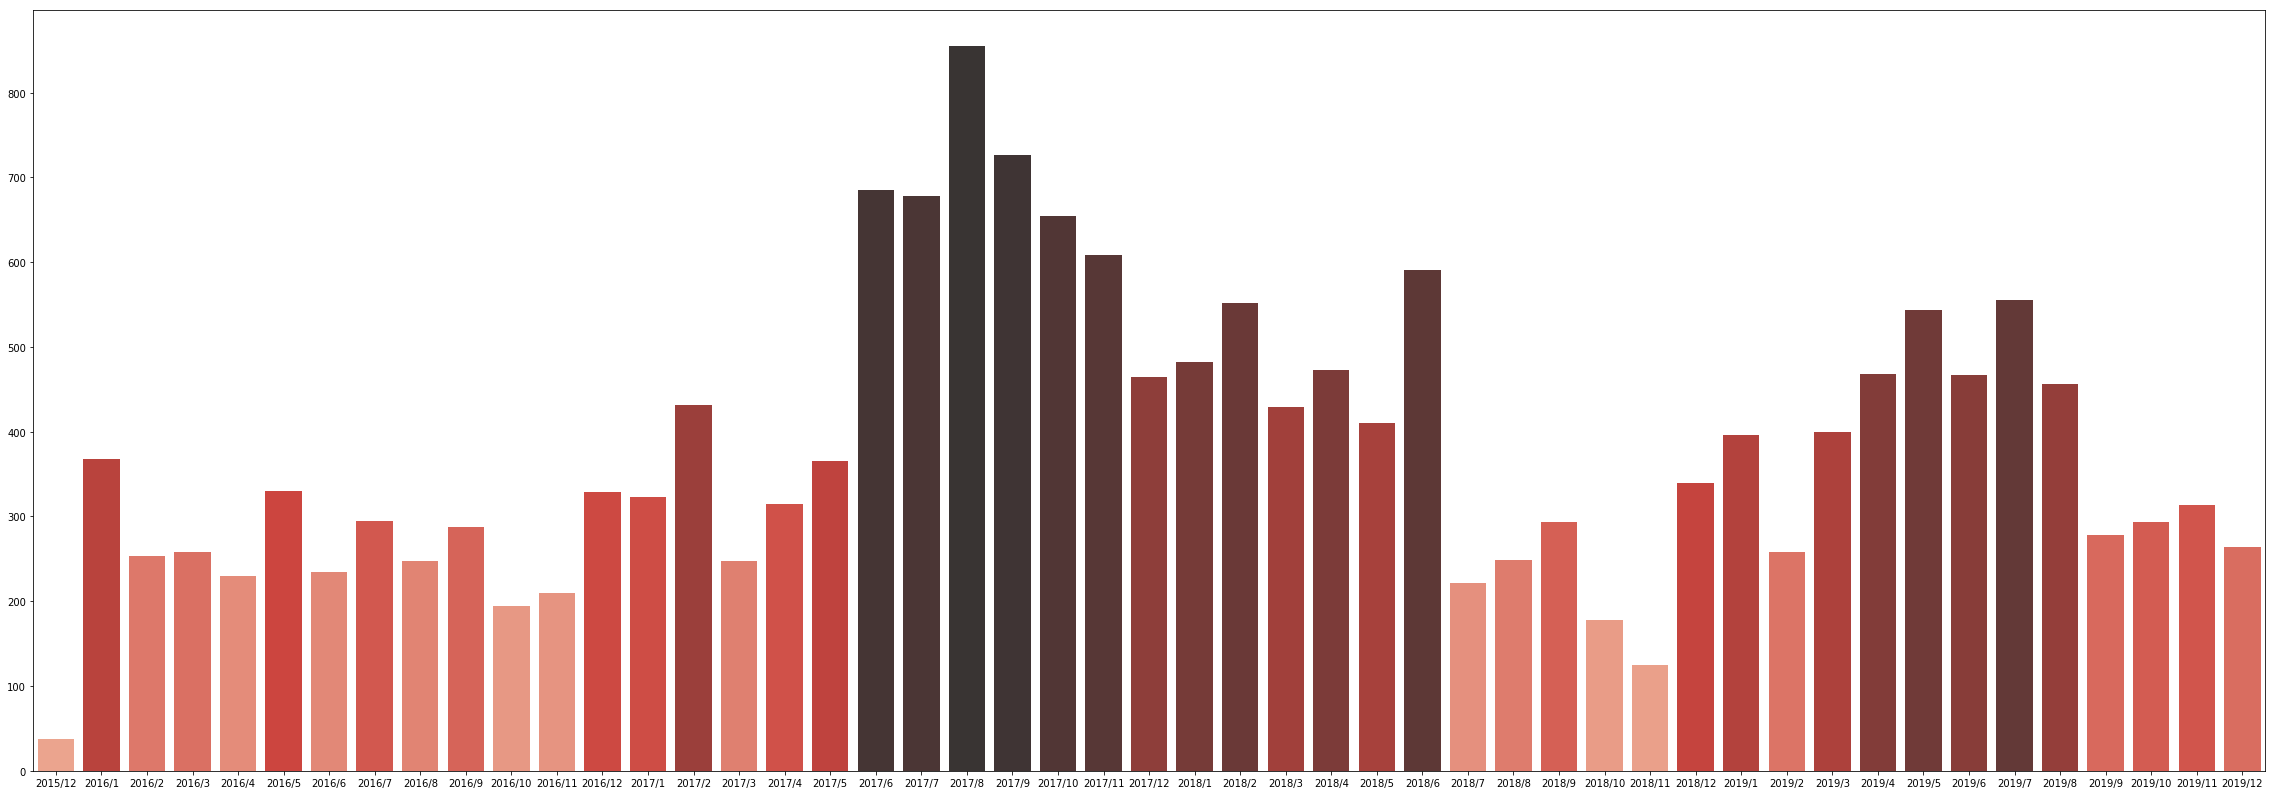

In [12]:
get_monthly_video_count_plot(df)

In [13]:
get_top_k_videos(df,15)

[('Alan Walker - Faded', 20),
 ('Tokyo Bon 東京盆踊り2020 (MakuDonarudo) Namewee 黃明志 ft.Cool Japan TV @亞洲通吃2018專輯 All Eat Asia',
  17),
 ('The video introducing the facilities of Yokohama Hakkeijima Sea Paradise',
  16),
 ("4 Non Blondes - What's Up (Official Video)", 16),
 ('American Authors - Best Day Of My Life (Official Video)', 15),
 ('THE WHITE BUFFALO - "This Year" (Official Audio)', 14),
 ('White Noise Frequency to Enhance Concentration (6 Hours)', 14),
 ('Stefan Otte: Deep Neural Networks with PyTorch | PyData Berlin 2018', 13),
 ('Coke Studio Season 9| Afreen Afreen| Rahat Fateh Ali Khan & Momina Mustehsan',
  13),
 ('Anfield erupts! Amazing scenes as Liverpool reach the Champions League final with stunning comeback!',
  12),
 ('Owl City - My Everything (Official Video)', 12),
 ('We Are Liverpool: This Means More', 12),
 ('Sean Rowe - "To Leave Something Behind"', 12),
 ('Matthew Perryman Jones - Land of the Living (As heard on Manchester By the Sea Movie Trailer)',
  12),
 ('Sunf